In [43]:
#importing all the libraries needed for performing EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## loading dataset and analysing it

In [44]:

df = pd.read_csv("Titanic-Dataset.csv")

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
#total rows and columns in dataset
df.shape

(891, 12)

In [47]:
#All columns of dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
# datatype of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
# convert column name to lower case for easy use
df.columns = df.columns.str.lower()

In [50]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## data plotting

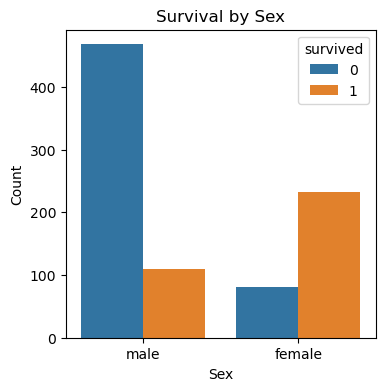

In [51]:
plt.figure(figsize=(4,4))
sns.countplot(x="sex", hue="survived", data=df)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival by Sex")
plt.show()

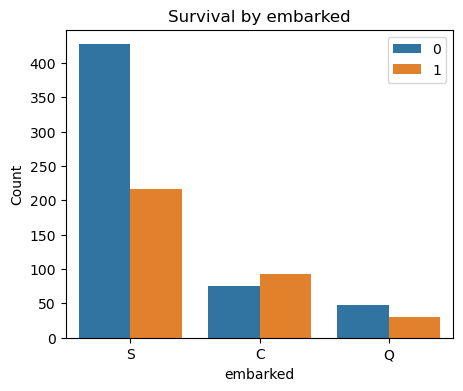

In [52]:
plt.figure(figsize=(5,4))
sns.countplot(x="embarked", hue="survived", data=df)
plt.legend()
plt.xlabel("embarked")
plt.ylabel("Count")
plt.title("Survival by embarked")
plt.show()



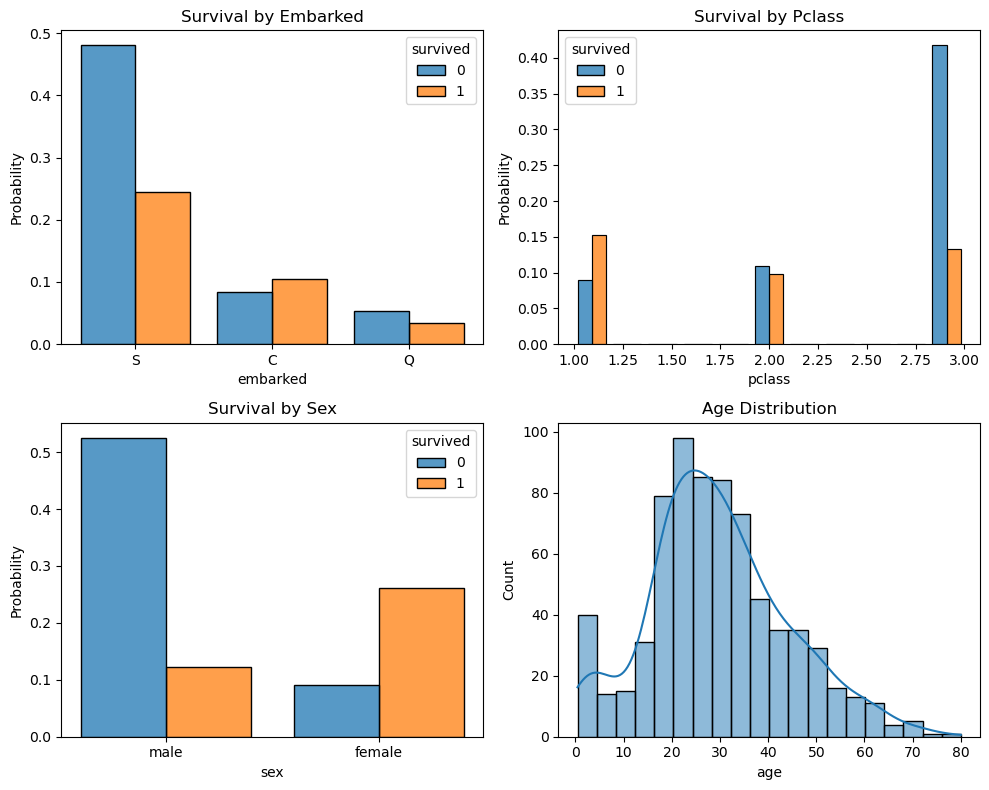

In [53]:
# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 cols

# axes is a 2D array: axes[row, col]

# Top-left: Embarked vs Survival
sns.histplot(
    data=df,
    x='embarked',
    hue='survived',
    multiple='dodge',
    stat='probability',
    shrink=0.8,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Survival by Embarked')

# Top-right: Pclass vs Survival
sns.histplot(
    data=df,
    x='pclass',
    hue='survived',
    multiple='dodge',
    stat='probability',
    shrink=0.8,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Survival by Pclass')

# Bottom-left: Sex vs Survival
sns.histplot(
    data=df,
    x='sex',
    hue='survived',
    multiple='dodge',
    stat='probability',
    shrink=0.8,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Survival by Sex')

# Bottom-right: Age histogram
sns.histplot(
    data=df,
    x='age',
    bins=20,
    kde=True,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Age Distribution')

plt.tight_layout()  # Adjust spacing between plots
plt.show()


## data cleaning

In [54]:
df.drop(['name','cabin','passengerid','ticket'],axis = 1,inplace=True)

In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
df.shape

(891, 8)

In [57]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [58]:
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21936\3970214140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_median, inplace=True)


In [59]:
embarked_mode = df['embarked'].mode()[0]
df['embarked'].fillna(embarked_mode, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21936\1719781870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(embarked_mode, inplace=True)


In [60]:
df['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [61]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [63]:
#  Convert Categorical Features to Numbers
df['sex'] = df['sex'].map({'male': 0, 'female': 1}).astype(int)
categorical_cols = ['embarked', 'pclass']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [64]:
# Create New Features
df['familysize'] = df['sibsp'] + df['parch'] + 1
df['isalone'] = 0
df.loc[df['familysize'] == 1, 'isalone'] = 1
df.drop(['sibsp', 'parch'], axis=1, inplace=True)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int32  
 2   age         891 non-null    float64
 3   fare        891 non-null    float64
 4   embarked_Q  891 non-null    int32  
 5   embarked_S  891 non-null    int32  
 6   pclass_2    891 non-null    int32  
 7   pclass_3    891 non-null    int32  
 8   familysize  891 non-null    int64  
 9   isalone     891 non-null    int64  
dtypes: float64(2), int32(5), int64(3)
memory usage: 52.3 KB


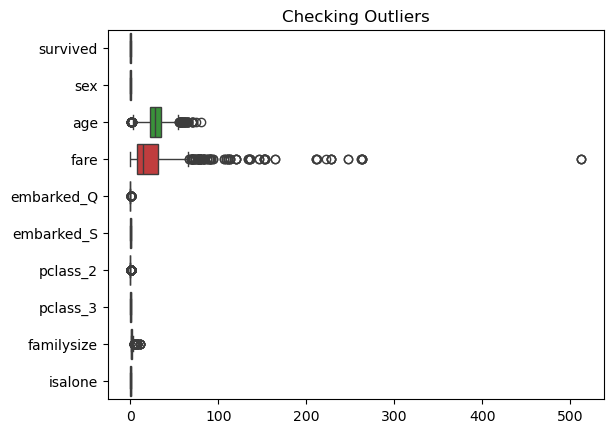

In [66]:
sns.boxplot(data=df, orient='h')
plt.title("Checking Outliers")
plt.show()


In [67]:
df.describe()

,survived,sex,age,fare,embarked_Q,embarked_S,pclass_2,pclass_3,familysize,isalone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.352413,29.361582,32.204208,0.086420,0.725028,0.206510,0.551066,1.904602,0.602694
std,0.486592,0.477990,13.019697,49.693429,0.281141,0.446751,0.405028,0.497665,1.613459,0.489615
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,28.000000,14.454200,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,35.000000,31.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000


In [68]:
df.shape

(891, 10)

In [69]:
df['fare_log'] = np.log1p(df['fare'])
df.drop(columns='fare',axis=1,inplace=True)

In [70]:
df.columns

Index(['survived', 'sex', 'age', 'embarked_Q', 'embarked_S', 'pclass_2',
       'pclass_3', 'familysize', 'isalone', 'fare_log'],
      dtype='object')

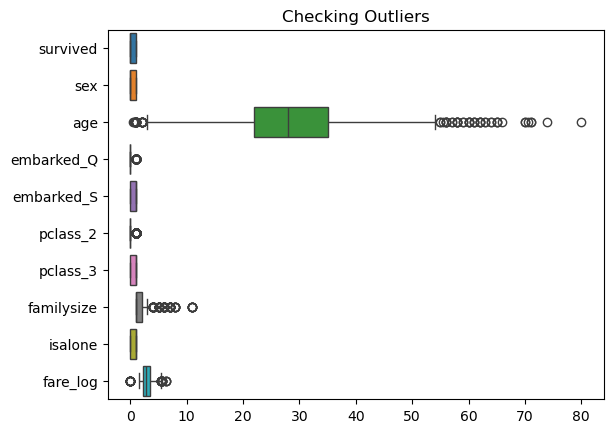

In [71]:
sns.boxplot(data=df, orient='h')
plt.title("Checking Outliers")
plt.show()


In [72]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for outliers
is_outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Count number of outliers in each column
outlier_count = is_outlier.sum()

print("Outlier count per column:")
print(outlier_count)


Outlier count per column:
survived        0
sex             0
age            66
embarked_Q     77
embarked_S      0
pclass_2      184
pclass_3        0
familysize     91
isalone         0
fare_log       31
dtype: int64


<Figure size 2000x1000 with 0 Axes>

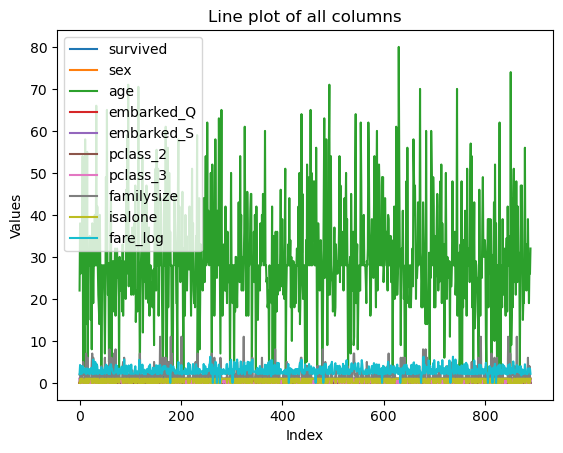

In [73]:
plt.figure(figsize=(20, 10))
df.plot(kind='line')
plt.title("Line plot of all columns")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend(loc='best')
plt.show()

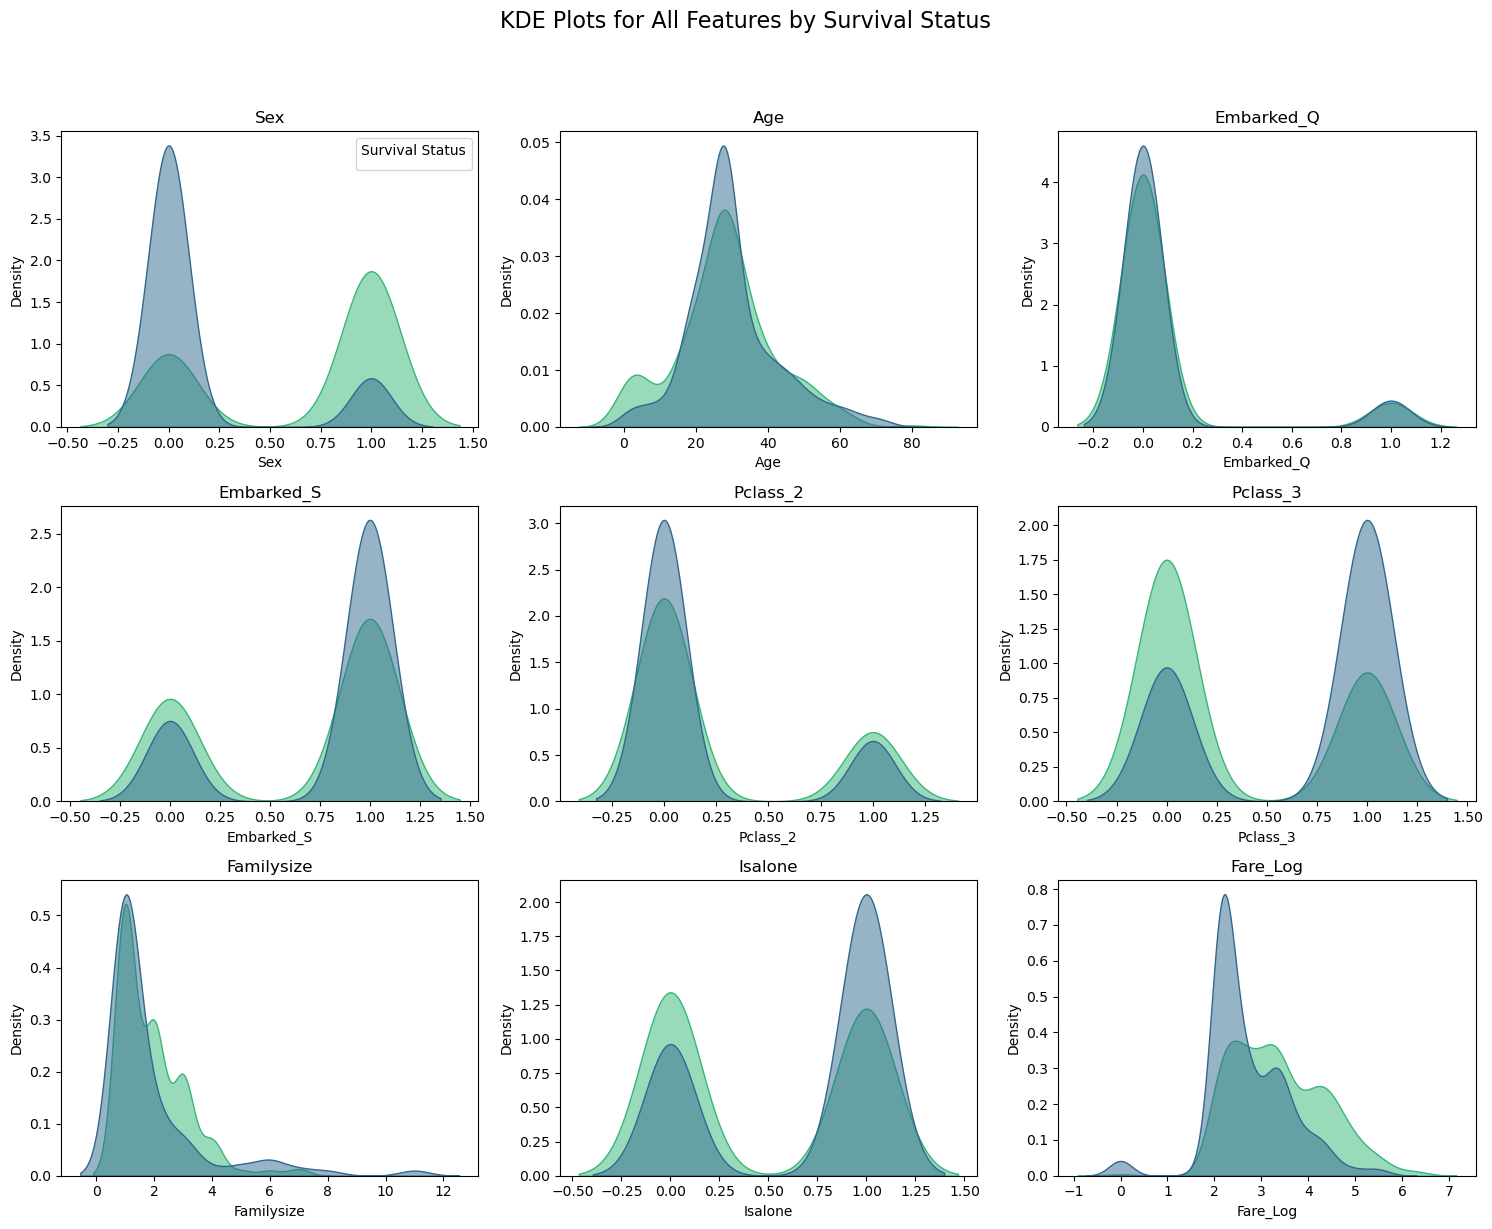

In [74]:
feature_cols = df.drop('survived', axis=1).columns.tolist()

# Define the number of plots and the grid size
n_features = len(feature_cols)
n_rows = 3
n_cols = 3 

# Set up the figure for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('KDE Plots for All Features by Survival Status', fontsize=16, y=1.02)

# Loop through all features and create a KDE plot for each
for i, col in enumerate(feature_cols):
    ax = axes[i]
    # Use seaborn's kdeplot, splitting by the target variable 'survived'
    sns.kdeplot(data=df, x=col, hue='survived', fill=True, common_norm=False, 
                alpha=0.5, ax=ax, palette='viridis', legend=(i == 0))
    
    ax.set_title(f'{col.title()}', fontsize=12)
    ax.set_xlabel(col.title())
    ax.set_ylabel('Density')
    
    # Only add the legend to the first plot
    if i > 0:
        ax.legend([], [], frameon=False) 
    else:
        # Relabel legend for clarity
        current_handles, current_labels = ax.get_legend_handles_labels()
        ax.legend(current_handles, ['Perished (0)', 'Survived (1)'], title='Survival Status')

# Remove any unused subplots
if n_features < n_rows * n_cols:
    for j in range(n_features, n_rows * n_cols):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


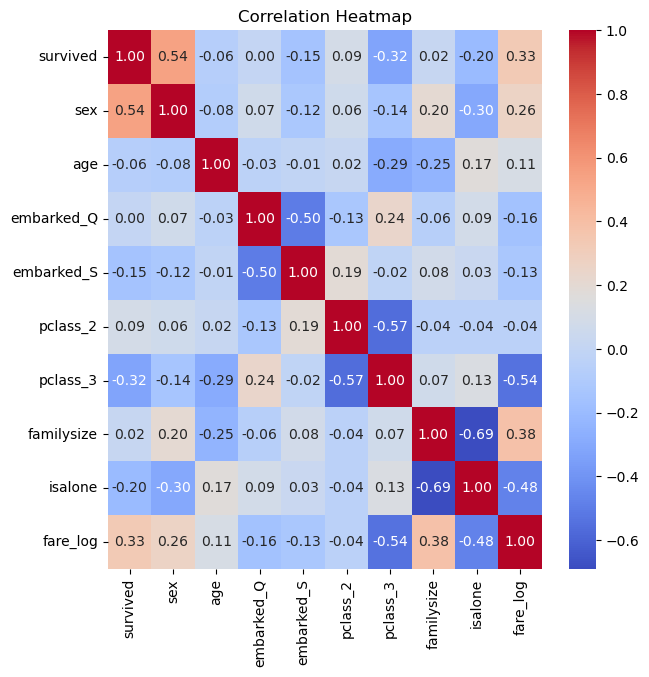

In [75]:

# Compute correlation matrix
corr = df[df.columns].corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## ML Modeling (Random Forest )

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
y = df['survived']
x = df.drop('survived', axis=1)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=45
)


In [87]:
x_train.head()

,sex,age,embarked_Q,embarked_S,pclass_2,pclass_3,familysize,isalone,fare_log
332,0,38.0,0,1,0,0,2,0,5.039951
281,0,28.0,0,1,0,1,1,1,2.180892
147,1,9.0,0,1,0,1,5,0,3.566005
11,1,58.0,0,1,0,0,1,1,3.316003
405,0,34.0,0,1,1,0,2,0,3.091042


In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [79]:
model = RandomForestClassifier(n_estimators=300,
                               max_depth= 5, 
                               min_samples_split=4,
                               min_samples_leaf=2,
                               random_state=45)
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=300, random_state=45)

In [80]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88268156424581

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       117
           1       0.85      0.81      0.83        62

    accuracy                           0.88       179
   macro avg       0.87      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



#### accurecy of logistic regression 
Accuracy: 0.8212290502793296
so choosed random forest

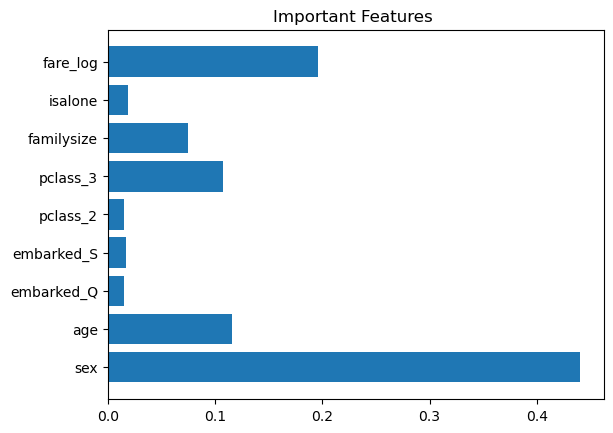

In [81]:
importances = model.feature_importances_
feature_names = x.columns

plt.barh(feature_names, importances)
plt.title("Important Features ")
plt.show()


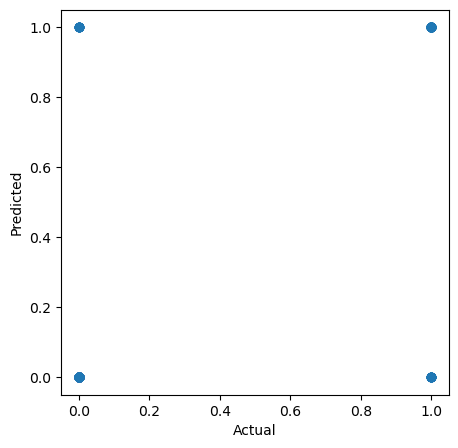

In [82]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 0.11731843575418995
RMSE: 0.3425177889602085
R2: 0.4818031430934657


In [84]:
print(df.corr()['survived'].sort_values(ascending=False))


survived      1.000000
sex           0.543351
fare_log      0.329862
pclass_2      0.093349
familysize    0.016639
embarked_Q    0.003650
age          -0.064910
embarked_S   -0.149683
isalone      -0.203367
pclass_3     -0.322308
Name: survived, dtype: float64


In [86]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']